# Histograms: An Overview

Histograms are graphical representations of data distribution. They are made by dividing the range of values into intervals, known as bins, and counting the number of data points that fall into each bin. The results are displayed as bars, with the height of each bar representing the frequency of data points within each bin.

## Utility:
1. **Data Distribution**: Histograms are particularly effective for showing the distribution of a dataset, revealing patterns such as skewness, kurtosis, and modality (e.g., unimodal, bimodal).
2. **Frequency Analysis**: They provide a clear view of the frequency distribution of data points, helping in understanding the central tendency and variability.
3. **Identifying Outliers**: Histograms can help identify outliers and anomalies within the data.
4. **Comparing Distributions**: By using multiple histograms, one can compare the distributions of different datasets or variables.

## When to Use Histograms:
1. **Large Datasets**: When dealing with large datasets, histograms can simplify complex data into an understandable format.
2. **Frequency Analysis**: When the goal is to analyze the frequency of data points within specific ranges.
3. **Distribution Analysis**: To analyze the shape and spread of data distributions.
4. **Data Quality Assessment**: To assess data quality by identifying gaps, outliers, or unusual patterns.

## Pitfalls of Using Histograms:
1. **Bin Size Sensitivity**: The choice of bin size can significantly affect the appearance and interpretation of the histogram. Too few bins can oversimplify the data, while too many bins can overcomplicate it.
2. **Misleading Representation**: Improper scaling or axis manipulation can lead to misleading representations of the data.
3. **Overlapping Data**: When comparing multiple histograms, overlapping data can obscure the differences between distributions.
4. **Data Loss**: Histograms can sometimes obscure the details of individual data points, leading to loss of information.
5. **Non-Uniform Bin Width**: Using bins of different widths can distort the visualization and mislead the viewer.

## Mitigation Strategies:
1. **Optimal Bin Size**: Use statistical methods like Sturges' rule, Scott's normal reference rule, or the Freedman-Diaconis rule to determine an optimal bin size that balances detail and clarity.

### Bin Size Determination Rules: Brief Overview

**Sturges's Rule**:
- **Formula**: $k = 1 + \log_2(N)$
- **Explanation**: This rule suggests the number of bins ($ k $) based on the number of data points ($ N $). It is simple and works well for smaller datasets, but can underperform with larger, non-normal datasets.
- **Use Case**: Suitable for small to moderately sized datasets.

**Scott's Normal Reference Rule**:
- **Formula**: $\text{Bin Width} = 3.49 \frac{\sigma}{N^{1/3}}$
- **Explanation**: This rule uses the sample standard deviation ($ sigma $) and the number of data points ($ N $) to determine bin width. It is optimal for data following a normal distribution.
- **Use Case**: Ideal for normally distributed data with moderate to large sample sizes.

**Freedman-Diaconis Rule**:
- **Formula**:$\text{Bin Width} = 2 \frac{IQR}{N^{1/3}}$
- **Explanation**: This rule uses the interquartile range ($ IQR $) and the number of data points ($ N $) to calculate bin width. It is robust to outliers and skewed distributions.
- **Use Case**: Best for data with outliers or skewed distributions, suitable for large datasets.

2. **Consistent Scaling**: Ensure that the axes are scaled consistently to avoid misleading interpretations. Clearly label axes and use proportional intervals.
3. **Overlay Transparently**: When comparing multiple distributions, use transparent overlays or side-by-side histograms to maintain clarity and avoid overlap.
4. **Data Aggregation**: Where possible, aggregate data in a way that retains meaningful patterns without oversimplifying or losing significant details.
5. **Uniform Bin Width**: Maintain uniform bin widths to ensure accurate representation of the data distribution. If non-uniform widths are necessary, clearly indicate this and use proportional area plots.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing data
data = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/dengue-dataset.csv"
df = pd.read_csv(data,
                 index_col='data',
                 parse_dates=True)

# check first 5 rows
df.head()

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
data,,,,,
1998-01-01,237,179.2,25.7,20.2,28.1
1998-02-01,331,226.3,25.1,20.0,28.0
1998-03-01,562,149.1,24.8,22.4,27.2
1998-04-01,187,46.4,22.7,18.1,26.0
1998-05-01,32,88.3,19.2,15.7,22.9


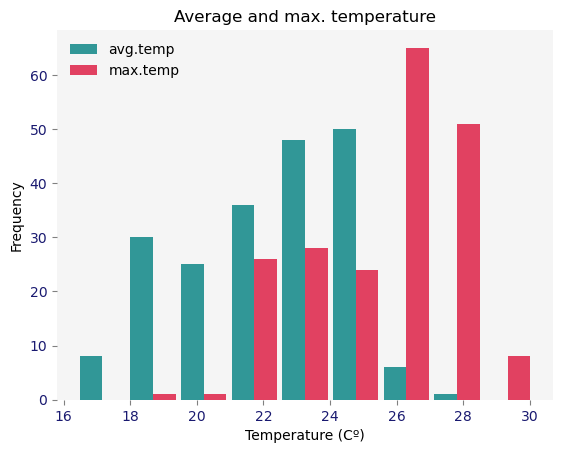

<Figure size 3000x3000 with 0 Axes>

In [2]:
fig,ax = plt.subplots();

# set figure attributes
fig = plt.figure(figsize=(10,10),
                 dpi=300,
                 );

# bin sizes using the Sturges's rule since the dataset is small and average temperature should approximate a normal distribution
num_bins = 1 + np.log2(df.shape[0]).round(0).astype('int64')

# creating the histogram
ax.hist(df[['temperatura-media','temperatura-maxima']],
        bins=num_bins,
        rwidth=0.9,
        color=['teal','crimson'],
        alpha=0.8,
        );

# set legend when using more than two variables
ax.legend(['avg.temp','max.temp'],
          loc='best',
          frameon=False)

# set axes attributes
ax.set(title="Average and max. temperature",
       ylabel="Frequency",
       xlabel="Temperature (Cº)",
       facecolor='whitesmoke'
       );

ax.xaxis.set_tick_params(labelcolor='midnightblue',
                         color='grey')

ax.yaxis.set_tick_params(labelcolor='midnightblue',
                         color='grey')

ax.spines[:].set_visible(False);